# Test

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from src.oxford_pet import *
import torch
from src.utils import soft_dice_loss

In [6]:
trainset = load_dataset("./data", mode="train")

In [7]:
import matplotlib.pyplot as plt
# Iterate through the DataLoader and get the first batch for visualization
for batch_idx, sample in enumerate(trainset):
    images = sample["image"]    # Shape: [batch_size, channels, height, width]
    masks = sample["mask"]      # Shape: [batch_size, 1, height, width]
    trimaps = sample["trimap"]  # Shape: [batch_size, 1, height, width]
    # print(masks.shape)
    print(soft_dice_loss(pred, masks))

    # print(images.shape)
    # Select the first example in the batch
    # For images, transpose from [C, H, W] to [H, W, C] for proper display.
    image = images[0].numpy().transpose(1, 2, 0)
    mask = masks[0].squeeze().numpy()   # Remove the channel dimension
    trimap = trimaps[0].squeeze().numpy()  # Remove the channel dimension
    pred = pred[0].detach().cpu().numpy().squeeze()


    # Apply threshold to create a binary mask
    binary_mask = (pred > 0.5).astype(np.uint8)
    
    # Create a grid plot with 1 row and 3 columns
    fig, axs = plt.subplots(1, 4, figsize=(15, 5))
    
    # Plot the original image
    axs[0].imshow(image)
    axs[0].set_title("Image")
    axs[0].axis("off")
    
    # Plot the mask using a grayscale colormap
    axs[1].imshow(mask, cmap="gray")
    axs[1].set_title("Mask")
    axs[1].axis("off")

    axs[2].imshow(pred, cmap="gray")
    axs[2].set_title("pred")
    axs[2].axis("off")
    
    # Plot the trimap using a grayscale colormap
    axs[3].imshow(trimap, cmap="gray")
    axs[3].set_title("Trimap")
    axs[3].axis("off")
    
    plt.tight_layout()
    plt.show()
    
    # Visualize only the first batch
    break


NameError: name 'pred' is not defined

In [ ]:
from src.models import unet
from torchinfo import summary

In [ ]:
predictor = unet.Unet(n_channels=3, n_classes=1)


In [ ]:
summary(predictor, input_size=(32, 3, 256, 256))

Layer (type:depth-idx)                   Output Shape              Param #
Unet                                     [32, 1, 248, 248]         --
├─DoubleConv: 1-1                        [32, 64, 252, 252]        --
│    └─Sequential: 2-1                   [32, 64, 252, 252]        --
│    │    └─Conv2d: 3-1                  [32, 64, 254, 254]        1,728
│    │    └─ReLU: 3-2                    [32, 64, 254, 254]        --
│    │    └─Conv2d: 3-3                  [32, 64, 252, 252]        36,864
│    │    └─ReLU: 3-4                    [32, 64, 252, 252]        --
├─Down: 1-2                              [32, 128, 124, 124]       --
│    └─Sequential: 2-2                   [32, 128, 124, 124]       --
│    │    └─DoubleConv: 3-5              [32, 128, 248, 248]       221,184
│    │    └─MaxPool2d: 3-6               [32, 128, 124, 124]       --
├─Down: 1-3                              [32, 256, 60, 60]         --
│    └─Sequential: 2-3                   [32, 256, 60, 60]         --
│  

In [ ]:
from src.models import resnet34_unetv2
from torchinfo import summary
import torch

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
predictor2 = resnet34_unetv2.ResUnet_CBAM(in_channels = 3, out_channels = 1).to(device)
predictor = resnet34_unetv2.ResUnet_CBAM(in_channels = 3, out_channels = 1)

In [ ]:
summary(predictor2, input_size=(32, 3, 256, 256)) # GPU ready

Layer (type:depth-idx)                        Output Shape              Param #
ResUnet_CBAM                                  [32, 1, 256, 256]         --
├─Sequential: 1-1                             [32, 64, 256, 256]        --
│    └─Conv2d: 2-1                            [32, 64, 256, 256]        1,728
│    └─BatchNorm2d: 2-2                       [32, 64, 256, 256]        128
│    └─ReLU: 2-3                              [32, 64, 256, 256]        --
├─ResidualBlock: 1-2                          [32, 64, 256, 256]        --
│    └─Conv2d: 2-4                            [32, 64, 256, 256]        36,864
│    └─BatchNorm2d: 2-5                       [32, 64, 256, 256]        128
│    └─ReLU: 2-6                              [32, 64, 256, 256]        --
│    └─Conv2d: 2-7                            [32, 64, 256, 256]        36,864
│    └─BatchNorm2d: 2-8                       [32, 64, 256, 256]        128
│    └─ReLU: 2-9                              [32, 64, 256, 256]        --
├─Resi

In [ ]:
from src.train import train

In [ ]:
train = train()

TypeError: train() missing 1 required positional argument: 'args'

In [8]:
from src.oxford_pet import *

root_dir = './data'
train_dataset = SimpleOxfordPetDataset(root=root_dir, mode="train")
valid_dataset = SimpleOxfordPetDataset(root=root_dir, mode="valid")
test_dataset = SimpleOxfordPetDataset(root=root_dir, mode="test")

# Print out the number of samples in each split.
print("Training samples:", len(train_dataset))
print("Validation samples:", len(valid_dataset))
print("Test samples:", len(test_dataset))

Training samples: 3312
Validation samples: 368
Test samples: 3669


# Inference

In [ ]:
import torch
from src.models.unet import Unet
import os

checkpt_path = "./runs/checkpoints/no_process_unet/best_checkpoint.pth"


# Define and instantiate your model
model = Unet(n_channels=3, n_classes=1)  # Replace with your model class

# Specify the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the checkpoint
checkpoint = torch.load(checkpt_path, map_location=device)

# Load the model state dictionary
model.load_state_dict(checkpoint['model_state_dict'])

# Optionally, if your checkpoint also saved optimizer state, you can load it
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

# Set the model to evaluation mode if needed
model.eval()


C:\Users\daikon\AppData\Local\Temp\ipykernel_19216\3562200009.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpt_path, map_location=device)

Unet(
  (inc): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (3): ReLU(inplace=True)
    )
  )
  (down1): Down(
    (dcc): Sequential(
      (0): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), bias=False)
          (1): ReLU(inplace=True)
          (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), bias=False)
          (3): ReLU(inplace=True)
        )
      )
      (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (down2): Down(
    (dcc): Sequential(
      (0): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), bias=False)
          (1): ReLU(inplace=True)
          (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), bias=False)


In [ ]:
from src.oxford_pet import *

testset = load_dataset("./data", mode="test")
print(device)

cuda


C:\Users\daikon\AppData\Local\Temp\ipykernel_19216\3476879980.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpt_path, map_location=device)

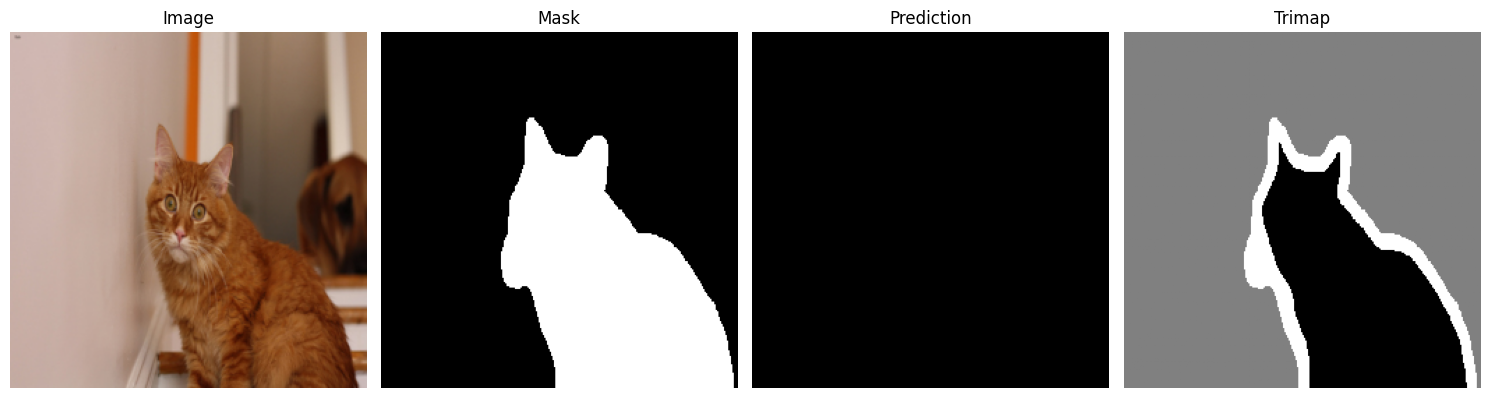

In [ ]:
import torch
from src.models.unet import Unet
import os
import matplotlib.pyplot as plt
import torch.nn.functional as F

checkpt_path = "./runs/checkpoints/no_process_unet/best_checkpoint.pth"

# Define and instantiate your model
model = Unet(n_channels=3, n_classes=1)

# Specify the device and move the model to that device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Load the checkpoint
checkpoint = torch.load(checkpt_path, map_location=device)

# Load the model state dictionary
model.load_state_dict(checkpoint['model_state_dict'])

# Set the model to evaluation mode
model.eval()

# Iterate through the DataLoader and get the first batch for visualization
for batch_idx, sample in enumerate(testset):
    images = sample["image"].to(device)    # Shape: [batch_size, channels, height, width]
    masks = sample["mask"]                  # Shape: [batch_size, 1, height, width]
    trimaps = sample["trimap"]              # Shape: [batch_size, 1, height, width]
    
    # Get predictions
    pred = model(images.float())
    pred = F.interpolate(pred, size=(256, 256), mode='bilinear', align_corners=False)
    # Select the first example in the batch for visualization
    image = images[0].cpu().numpy().transpose(1, 2, 0)  # Transpose for display
    mask = masks[0].squeeze().cpu().numpy()              # Remove channel dimension
    trimap = trimaps[0].squeeze().cpu().numpy()          # Remove channel dimension
    pred = pred[0].squeeze().detach().cpu().numpy()      # Detach and move to CPU
    binary_mask = (pred > 0.8).astype(np.uint8)
    # Create a grid plot with 1 row and 4 columns
    fig, axs = plt.subplots(1, 4, figsize=(15, 5))
    
    axs[0].imshow(image)
    axs[0].set_title("Image")
    axs[0].axis("off")
    
    axs[1].imshow(mask, cmap="gray")
    axs[1].set_title("Mask")
    axs[1].axis("off")
    
    axs[2].imshow(binary_mask, cmap="gray")
    axs[2].set_title("Prediction")
    axs[2].axis("off")
    
    axs[3].imshow(trimap, cmap="gray")
    axs[3].set_title("Trimap")
    axs[3].axis("off")
    
    plt.tight_layout()
    plt.show()
    
    # Visualize only the first batch
    break


# Transform

In [12]:
import os
import numpy as np
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader

# Base Dataset that returns raw numpy arrays
class OxfordPetDataset(Dataset):
    def __init__(self, root, mode="train", transform=None):
        assert mode in {"train", "valid", "test"}
        self.root = root
        self.mode = mode
        self.transform = transform

        self.images_directory = os.path.join(self.root, "images")
        self.masks_directory = os.path.join(self.root, "annotations", "trimaps")
        self.filenames = self._read_split()  # Implement this method

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        filename = self.filenames[idx]
        image_path = os.path.join(self.images_directory, filename + ".jpg")
        mask_path = os.path.join(self.masks_directory, filename + ".png")

        image = np.array(Image.open(image_path).convert("RGB"))
        trimap = np.array(Image.open(mask_path))
        mask = self._preprocess_mask(trimap)  # Implement your mask processing

        sample = {"image": image, "mask": mask, "trimap": trimap}

        # Do not apply transforms here if you want to resize in the subclass.
        return sample

    # Dummy implementations for illustration
    def _read_split(self):
        split_filename = "test.txt" if self.mode == "test" else "trainval.txt"
        split_filepath = os.path.join(self.root, "annotations", split_filename)
        with open(split_filepath) as f:
            split_data = f.read().strip("\n").split("\n")
        filenames = [x.split(" ")[0] for x in split_data]
        if self.mode == "train":  # 90% for train
            filenames = [x for i, x in enumerate(filenames) if i % 10 != 0]
        elif self.mode == "valid":  # 10% for validation
            filenames = [x for i, x in enumerate(filenames) if i % 10 == 0]
        return filenames

    def _preprocess_mask(self, trimap):
        return (trimap > 0).astype(np.uint8)

# Subclass that first resizes the raw NumPy arrays, then applies transforms.
class SimpleOxfordPetDataset(OxfordPetDataset):
    def __getitem__(self, *args, **kwargs):
        # Get the raw sample from the base class (with numpy arrays)
        sample = super().__getitem__(*args, **kwargs)

        # Resize the images using PIL while the data is still in numpy format.
        image = np.array(Image.fromarray(sample["image"]).resize((256, 256), Image.BILINEAR))
        mask = np.array(Image.fromarray(sample["mask"]).resize((256, 256), Image.NEAREST))
        trimap = np.array(Image.fromarray(sample["trimap"]).resize((256, 256), Image.NEAREST))

        sample["image"] = image
        sample["mask"] = mask
        sample["trimap"] = trimap

        # Now apply transforms (which may include ToTensor)
        if self.transform is not None:
            sample = self.transform(**sample)
        return sample

# ---------------------------
# Transformations definitions
# ---------------------------
class Compose:
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, **sample):
        for t in self.transforms:
            sample = t(**sample)
        return sample

class RandomHorizontalFlip:
    def __init__(self, p=0.5):
        self.p = p

    def __call__(self, **sample):
        if np.random.rand() < self.p:
            sample["image"] = np.fliplr(sample["image"]).copy()
            sample["mask"] = np.fliplr(sample["mask"]).copy()
            sample["trimap"] = np.fliplr(sample["trimap"]).copy()
        return sample

class RandomRotation90:
    def __call__(self, **sample):
        k = np.random.randint(0, 4)
        if k:
            sample["image"] = np.rot90(sample["image"], k)
            sample["mask"] = np.rot90(sample["mask"], k)
            sample["trimap"] = np.rot90(sample["trimap"], k)
        return sample

class MinMaxNormalization:
    def __call__(self, **sample):
        image = sample["image"]
        image = image.astype(np.float32) / 255.0
        sample["image"] = image
        return sample

class ToTensor:
    def __call__(self, **sample):
        sample["image"] = torch.from_numpy(sample["image"].copy()).float().permute(2, 0, 1)
        sample["mask"] = torch.from_numpy(sample["mask"].copy()).float()
        sample["trimap"] = torch.from_numpy(sample["trimap"].copy()).float()
        return sample

# Compose the transformations for training.
# Note: ToTensor is applied last so that resizing works on numpy arrays.
train_transform = Compose([
    RandomHorizontalFlip(p=0.5),
    RandomRotation90(),
    MinMaxNormalization(),
    ToTensor(),
])

# Instantiate the dataset with the updated workflow.
dataset = SimpleOxfordPetDataset(root="./data", mode="train", transform=train_transform)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Iterate over one batch (for demonstration)
for batch in dataloader:
    print("Images shape:", batch["image"].shape)
    print("Masks shape:", batch["mask"].shape)
    print("Trimaps shape:", batch["trimap"].shape)
    break


Images shape: torch.Size([2, 3, 256, 256])
Masks shape: torch.Size([2, 256, 256])
Trimaps shape: torch.Size([2, 256, 256])
